In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
import sklearn
import seaborn as sns

# Reading the data

This part is to read the cleaned data and check if there is NAN data or Infinite data.

In [2]:
data = "cell2celltrain_clean_updated_final.csv"
data = pd.read_csv(data)
feature = data.iloc[:, 2:]
label = data.iloc[:, 1]
print(f"The data contains nan features: {np.any(np.isnan(feature))}")
print(f"The data contains infinite features: {np.all(np.isfinite(feature))}")
print(f"The shape of the data is: {data.shape}")

data

The data contains nan features: False
The data contains infinite features: True
The shape of the data is: (49752, 75)


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes
0,3000002,1,-0.783391,-0.579032,-1.045275,-0.288506,-0.413714,-0.124522,-0.568070,-0.452482,...,0,0,0,1,0,0,0,1,0,0
1,3000010,1,-0.941570,-0.974488,-1.255720,-0.400881,-0.413714,-0.124522,0.029924,0.029852,...,0,0,0,1,0,0,0,0,0,1
2,3000014,0,-0.467484,-0.978272,-0.371853,-0.400881,-0.413714,-0.124522,0.037741,0.029852,...,1,0,0,0,0,0,0,0,0,1
3,3000022,0,0.531686,1.489066,1.185434,0.156497,-0.413714,-0.124522,0.659185,0.235479,...,0,0,1,0,0,0,0,1,0,0
4,3000026,1,-0.938185,-0.993409,-1.255720,-0.400881,-0.413714,-0.124522,0.045558,0.024775,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49747,3399894,0,-1.324946,-0.849607,-0.708564,-0.400881,-0.413714,-0.124522,0.045558,0.029852,...,0,0,0,1,0,0,0,1,0,0
49748,3399906,0,-0.604678,-0.874205,-1.255720,-0.400881,0.033780,-0.124522,-0.102964,-0.305243,...,0,0,1,0,0,0,0,0,0,1
49749,3399942,0,0.299494,0.376493,0.974990,-0.400881,-0.372087,-0.033135,-0.110781,-0.020920,...,0,0,0,1,0,0,0,0,1,0
49750,3399946,1,1.326193,-0.266831,-0.708564,-0.400881,2.187996,-0.124522,0.045558,0.029852,...,0,0,0,1,0,0,0,0,0,1


# Dimensionality reduction

After checking the data, we apply PCA algorithm into the model to get the features that count more variance. For those features, we transform them into the PCA form and use the values directly to do the following machine learning methods.

In [57]:
N_components = 20

pca = PCA(n_components=N_components)
pca.fit(feature)

# Fit transform to dataframe, keep feature names
X_new = pd.DataFrame(
    pca.fit_transform(feature),
    columns=["PC" + str(i) for i in range(1, N_components + 1)],
)

print(f"The total variance explained: {np.cumsum(pca.explained_variance_ratio_)[-1]}")

The total variance explained: 0.8409588022955473


# Splitting

We split the data into PCA form data and normal data. We use 30% samples for testing and 70% for training. For the normal data, there are 73 features and for the PCA form data, there are 20 features.

In [58]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_new, label, test_size=0.3
)
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.3)
print("X train shape: ", X_train.shape)
print("Y train shape: ", y_train.shape)
print("X test shape: ", X_test.shape)
print("Y test shape: ", y_test.shape)

X train shape:  (34826, 73)
Y train shape:  (34826,)
X test shape:  (14926, 73)
Y test shape:  (14926,)


# Random Forest

Firstly, we try the Random Forest Classifier. A Random Forest Classifier is an ensemble learning method used for both classification and regression tasks. It works in the following ways:
1. Ensemble of Decision Trees: This model has sets of decision trees. They are trained independently.
2. Random Subsampling of Features: During the construction of each tree, a random subset of features is considered at each split. This decorrelates the trees and makes the ensemble more robust.
3. Voting or Averaging: The predictions of individual trees are combined through a voting mechanism, where the class that receives the most votes becomes the final prediction. For regression tasks, the predictions are averaged.

## Without PCA

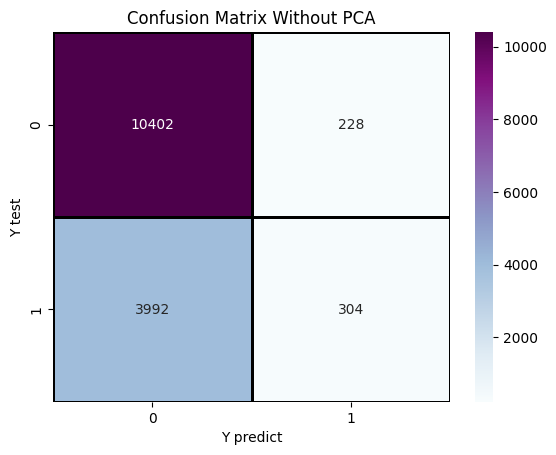

              precision    recall  f1-score   support

           0       0.72      0.98      0.83     10630
           1       0.57      0.07      0.13      4296

    accuracy                           0.72     14926
   macro avg       0.65      0.52      0.48     14926
weighted avg       0.68      0.72      0.63     14926



In [5]:
# random forest classifier

# without pca
model1 = RandomForestClassifier(n_estimators=100, random_state=9, n_jobs=-1)
model1.fit(X_train, y_train)
y_scores = model1.predict(X_test)
score = model1.score(X_test, y_test)
matrix = confusion_matrix(y_test, y_scores)
f, ax = plt.subplots()
sns.heatmap(
    matrix, annot=True, linewidth=0.75, linecolor="black", fmt="g", ax=ax, cmap="BuPu"
)
plt.title("Confusion Matrix Without PCA")
plt.xlabel("Y predict")
plt.ylabel("Y test")
plt.show()
report = classification_report(y_test, y_scores)
print(report)

For this confusion matrix, TP is 10404, FP is 248, FN is 3929, TN is 345. Thus, multiple evaluation methods are determined:
1. Recall=0.726
2. Precision=0.977
3. Accuracy=0.720
4. f=0.833


## With PCA

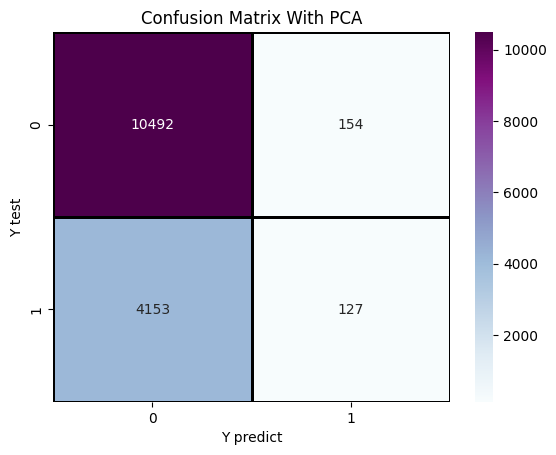

              precision    recall  f1-score   support

           0       0.72      0.99      0.83     10646
           1       0.45      0.03      0.06      4280

    accuracy                           0.71     14926
   macro avg       0.58      0.51      0.44     14926
weighted avg       0.64      0.71      0.61     14926



In [6]:
# random forest classifier

# with pca
model2 = RandomForestClassifier(n_estimators=100, random_state=9, n_jobs=-1)
model2.fit(X_train_pca, y_train_pca)
y_scores = model2.predict(X_test_pca)
score = model2.score(X_test_pca, y_test_pca)
cm = confusion_matrix(y_test_pca, y_scores)
f, ax = plt.subplots()
sns.heatmap(
    cm, annot=True, linewidth=0.75, linecolor="black", fmt="g", ax=ax, cmap="BuPu"
)
plt.title("Confusion Matrix With PCA")
plt.xlabel("Y predict")
plt.ylabel("Y test")
plt.show()
report = classification_report(y_test_pca, y_scores)
print(report)

Results show that without PCA, random forest classifier has 0.4% accuracy higher than the one use PCA form.


## SHAP explainability

In [36]:
import shap

shap.initjs()

# Number of samples to use for shapley values
N_samples = 100

# Random 1000 samples from the test set
X_test_sample = X_test.sample(n=N_samples, random_state=42)

# Getting shapley values
explainer = shap.Explainer(model1)
shap_values = explainer.shap_values(X_test_sample)

#### Summary - beeswarm plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


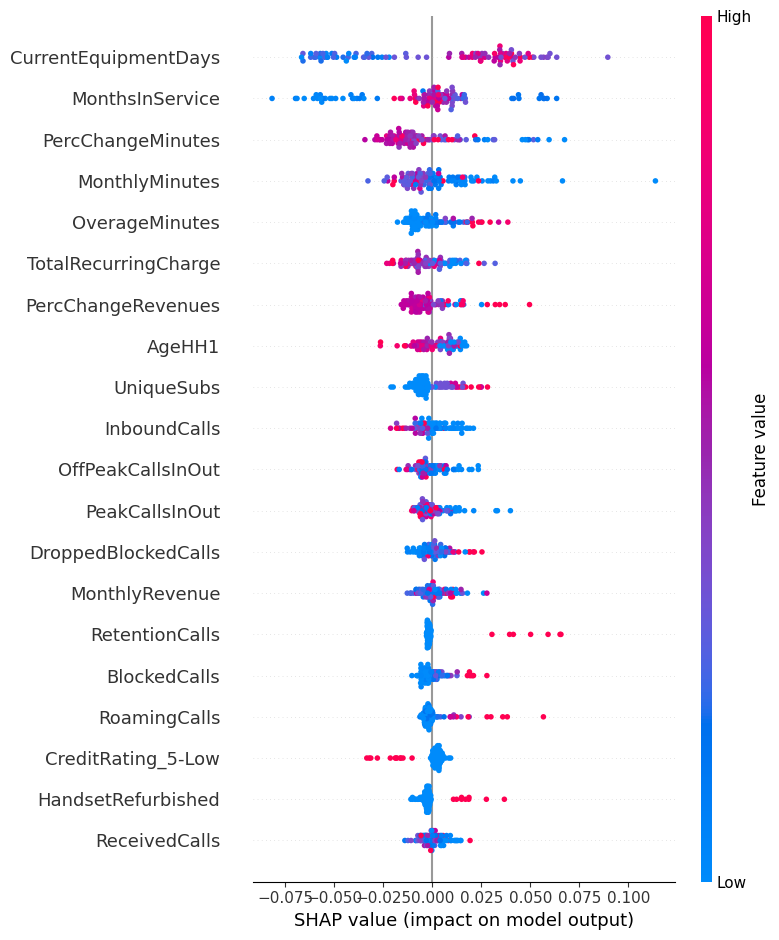

In [12]:
plt.grid(False)
shap.summary_plot(shap_values[1], X_test_sample)

#### Summary - bar plot

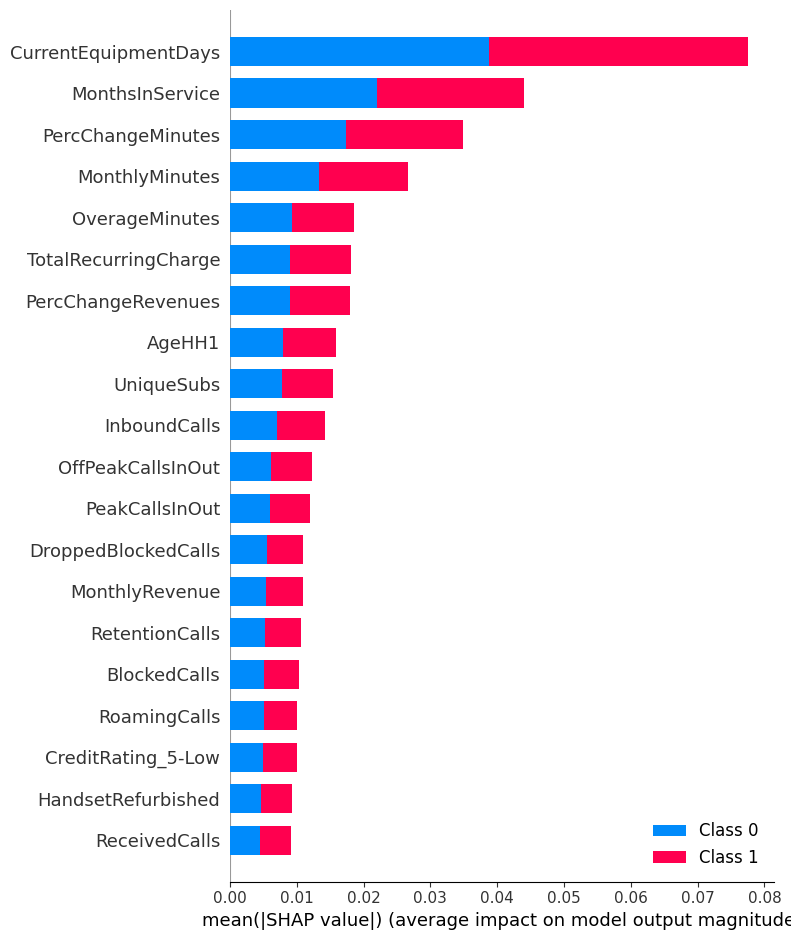

In [9]:
plt.grid(False)
shap.summary_plot(shap_values, X_test_sample, plot_type="bar")

#### Summary - force plot

In [14]:
shap.force_plot(
    explainer.expected_value[1], shap_values[1], X_test_sample, link="logit"
)

#### Force plot

In [15]:
# Choose a patient to plot
sample_ind = 0

shap.force_plot(
    explainer.expected_value[1],
    shap_values[1][sample_ind, :],
    X_test.iloc[sample_ind, :],
)

#### Waterfall plot

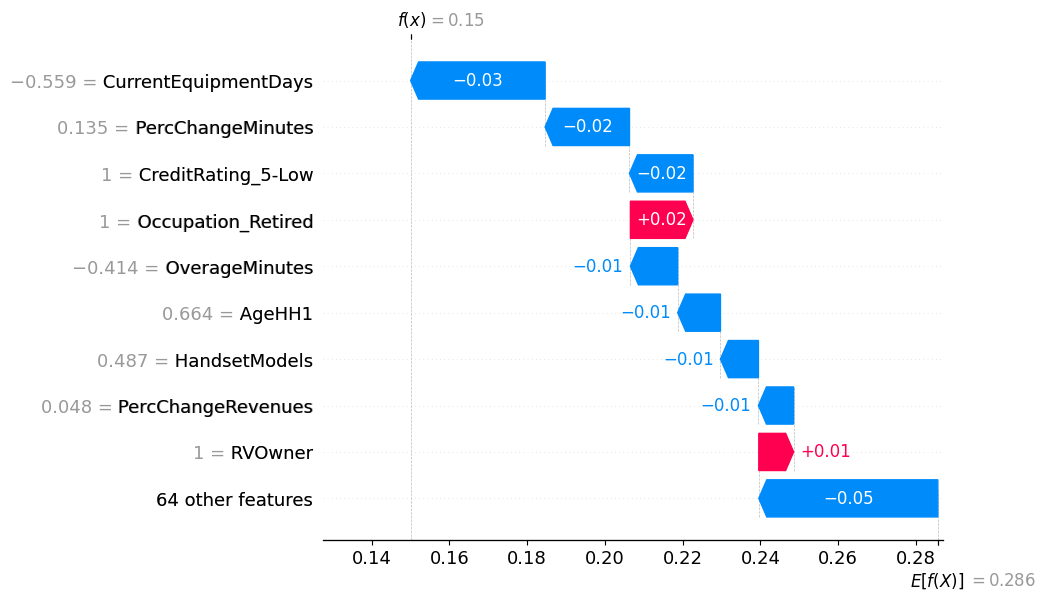

In [17]:
# Choose a patient to plot
sample_ind = 0

sv = explainer(X_test_sample)
exp = shap.Explanation(
    sv.values[:, :, 1],
    sv.base_values[:, 1],
    sv.data,
    feature_names=X_test_sample.columns,
)
shap.plots.waterfall(exp[sample_ind])

#### Dependence plot

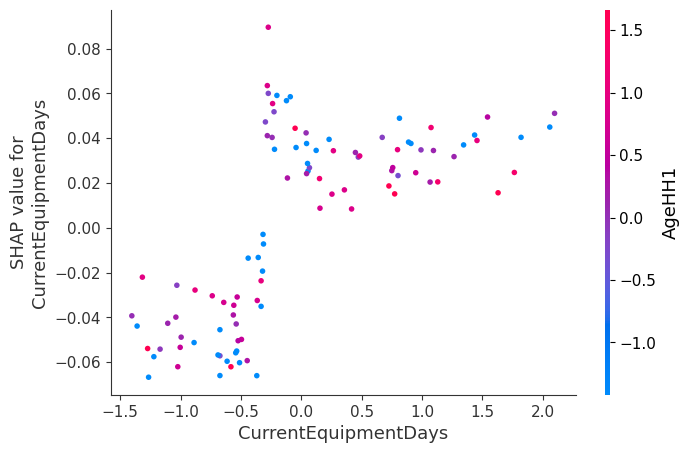

In [20]:
# Choose a feature to display
name = "CurrentEquipmentDays"

shap.dependence_plot(name, shap_values[1], X_test_sample)

#### Heatmap plot

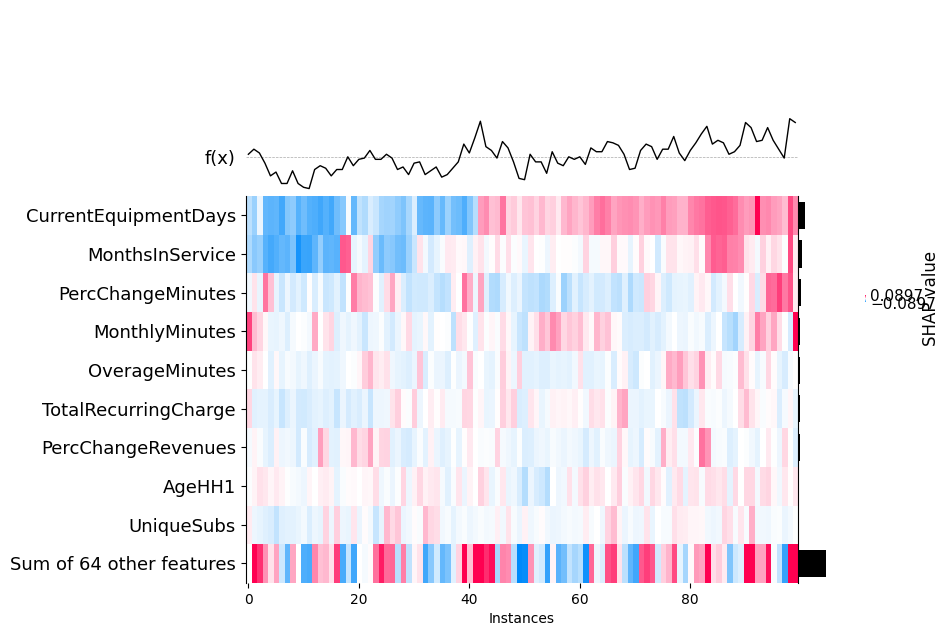

In [35]:
shap.plots.heatmap(sv[:, :, 1])

In the following two codes, we use logistic regression. For this binary classification problem, the model follows these steps:
1. Use linear combination model of the features: $z=b_0 + b_1x_1 + b_2x_2 \cdot\cdot\cdot + b_nx_n$
2. Put them into Sigmoid function $f(z) = \frac{1}{1 + e^{-z}}$
3. Maximum Likelihood Estimation Optimization. The goal is to find the set of weights and bias that maximizes the likelihood of the observed outcomes given the input features.

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.7102371700388583


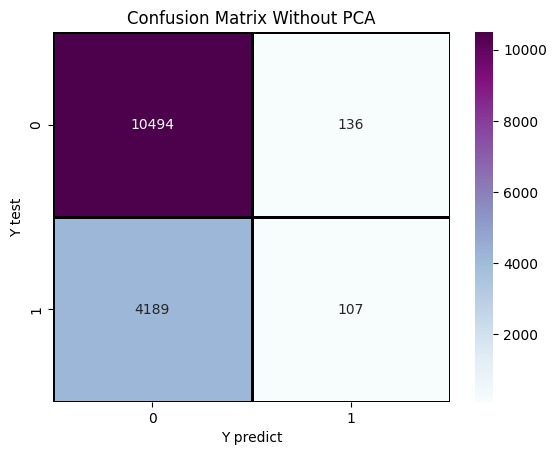

              precision    recall  f1-score   support

           0       0.71      0.99      0.83     10630
           1       0.44      0.02      0.05      4296

    accuracy                           0.71     14926
   macro avg       0.58      0.51      0.44     14926
weighted avg       0.64      0.71      0.60     14926



In [37]:
# logistic regression

# without pca
log_r = LogisticRegression(random_state=0).fit(X_train, y_train)
y_scores = log_r.predict(X_test)
results_naive = log_r.score(X_test, y_test)
print(results_naive)

cm = confusion_matrix(y_test, y_scores)
f, ax = plt.subplots()
sns.heatmap(
    cm, annot=True, linewidth=0.75, linecolor="black", fmt="g", ax=ax, cmap="BuPu"
)
plt.title("Confusion Matrix Without PCA")
plt.xlabel("Y predict")
plt.ylabel("Y test")
plt.show()
report = classification_report(y_test, y_scores)
print(report)

0.7117781053195765


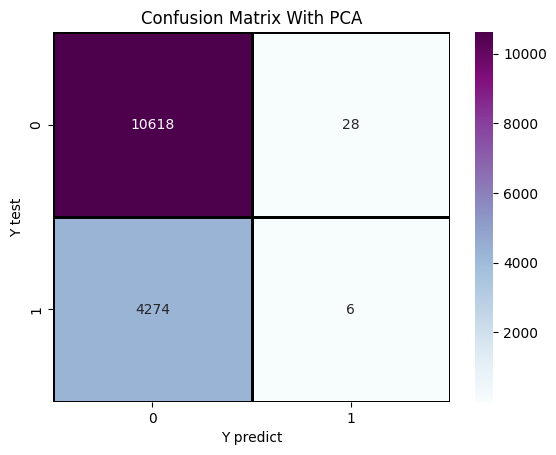

              precision    recall  f1-score   support

           0       0.71      1.00      0.83     10646
           1       0.18      0.00      0.00      4280

    accuracy                           0.71     14926
   macro avg       0.44      0.50      0.42     14926
weighted avg       0.56      0.71      0.59     14926



In [38]:
# with pca
log_r = LogisticRegression(random_state=0).fit(X_train_pca, y_train_pca)
y_scores = log_r.predict(X_test_pca)
results_pca = log_r.score(X_test_pca, y_test_pca)
print(results_pca)

cm = confusion_matrix(y_test_pca, y_scores)
f, ax = plt.subplots()
sns.heatmap(
    cm, annot=True, linewidth=0.75, linecolor="black", fmt="g", ax=ax, cmap="BuPu"
)
plt.title("Confusion Matrix With PCA")
plt.xlabel("Y predict")
plt.ylabel("Y test")
plt.show()
report = classification_report(y_test_pca, y_scores)
print(report)

Results show that without PCA, logistic classifier has 0.3% accuracy lower than the one use PCA form

## SHAP explainability

In [59]:
import shap

shap.initjs()

# Number of samples to use for shapley values
N_samples = 100

# Random 1000 samples from the test set
X_test_sample = X_test_pca.sample(n=N_samples, random_state=42)

# Getting shapley values
explainer = shap.LinearExplainer(log_r, X_test_sample)
shap_values = explainer.shap_values(X_test_sample)

#### Summary - beeswarm plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


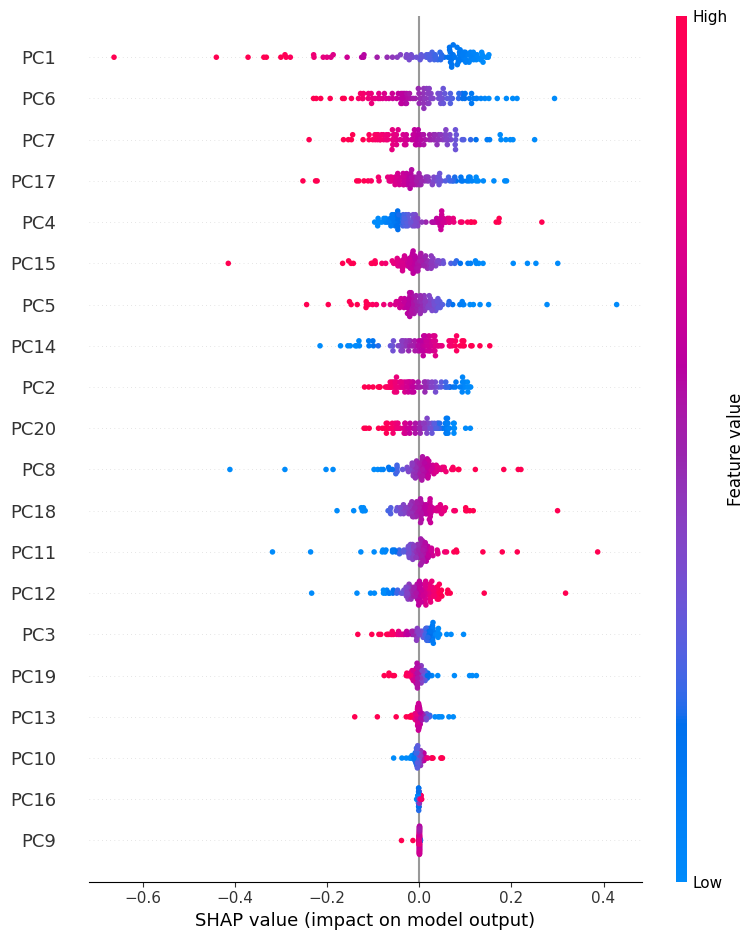

In [60]:
plt.grid(False)
shap.summary_plot(shap_values, X_test_sample)

#### Summary - bar plot

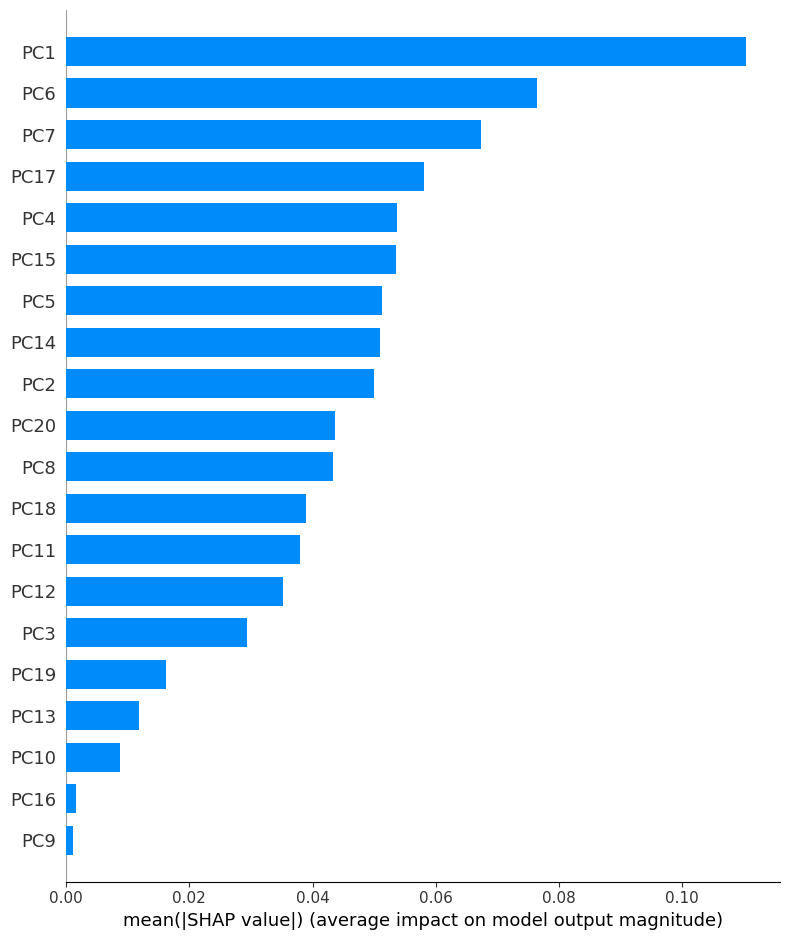

In [62]:
plt.grid(False)
shap.summary_plot(shap_values, X_test_sample, plot_type="bar")

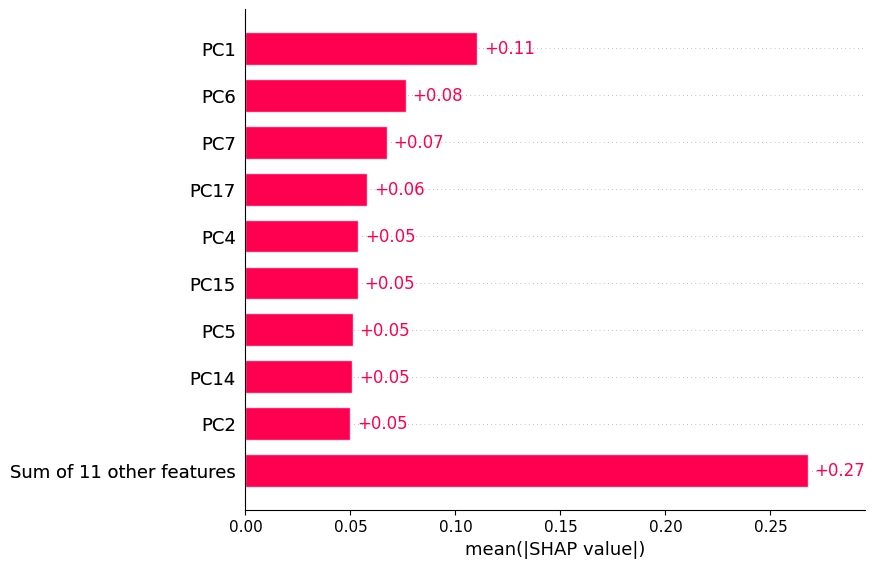

In [ ]:
plt.grid(False)
shap.plots.bar(explainer(X_test_sample))

#### Summary - force plot

In [66]:
shap.force_plot(explainer.expected_value, shap_values, X_test_sample, link="logit")

#### Force plot

In [67]:
# Choose a patient to plot
sample_ind = 1

shap.force_plot(
    explainer.expected_value,
    shap_values[sample_ind, :],
    X_test_sample.iloc[sample_ind, :],
    link="logit",
)

#### Waterfall plot

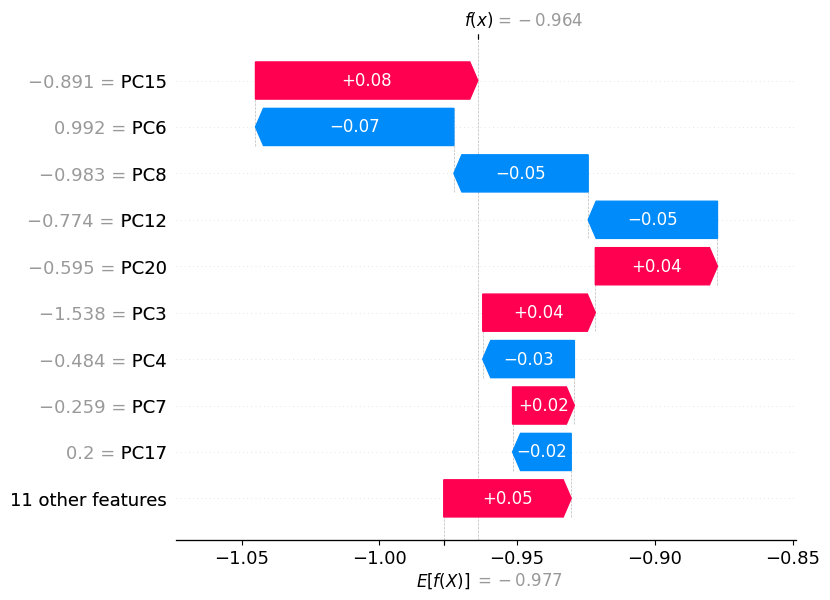

In [68]:
# Choose a patient to plot
sample_ind = 10

expl = explainer(X_test_sample)
expl.data = X_test_sample.values

plt.grid(False)
shap.plots.waterfall(expl[sample_ind])

#### Dependence plot

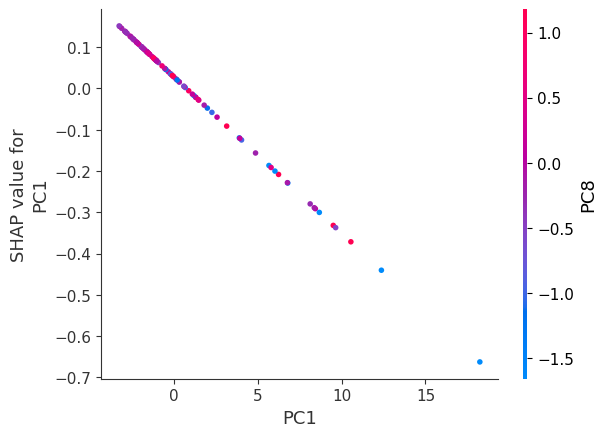

In [70]:
# Choose a feature to display
name = "PC1"

f, ax = plt.subplots()
ax.grid(False)
shap.dependence_plot(name, shap_values, X_test_sample, ax=ax)

#### Heatmap plot

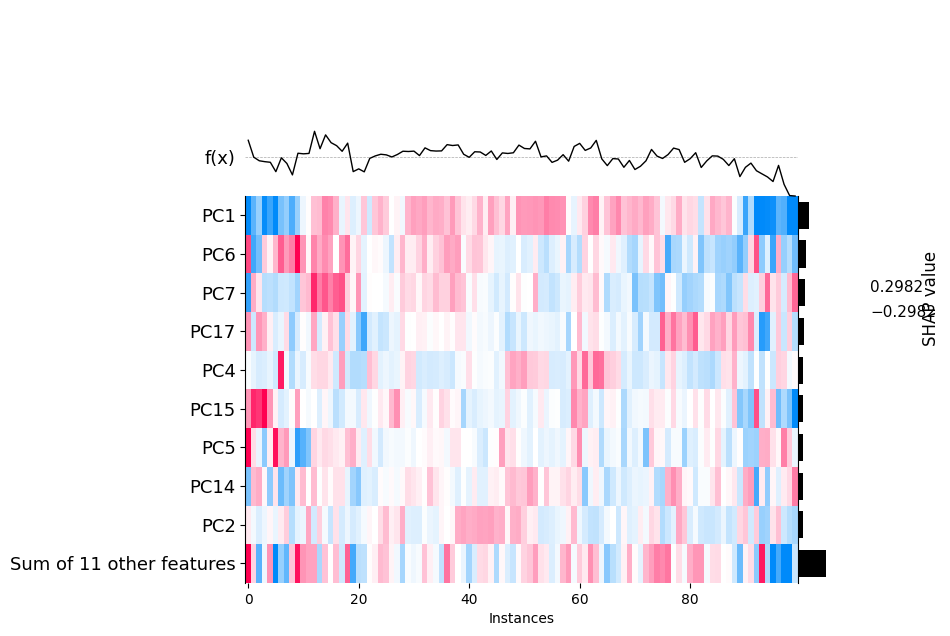

In [71]:
expl = explainer(X_test_sample)

shap.plots.heatmap(expl)

SVMs are particularly effective in high-dimensional spaces and are well-suited for situations where the data is not linearly separable. This method is to optimize the following objective function:
$$\text{Maximize } \frac{1}{2} \|w\|^2 - C \sum_{i=1}^{N} \xi_i$$
With constraints:
$$y_i (w^T x_i + b) \geq 1 - \xi_i, \quad \text{for } i = 1, 2, \ldots, N$$
$$\xi_i \geq 0
$$
Where
$w$ are weights.
$C$ is the regularization parameter.
$\xi_i$ are slack variables.

with pca AP:0.7109741390861584


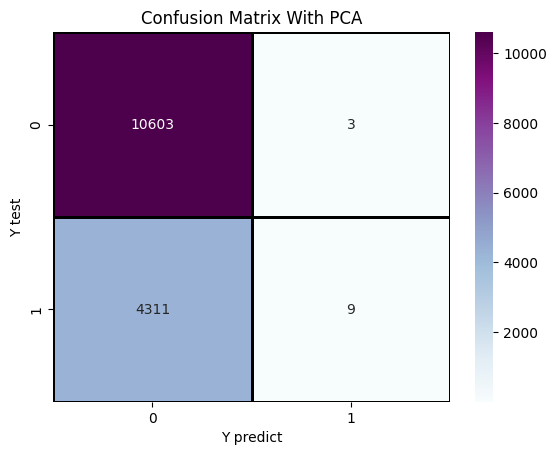

              precision    recall  f1-score   support

           0       0.71      1.00      0.83     10606
           1       0.75      0.00      0.00      4320

    accuracy                           0.71     14926
   macro avg       0.73      0.50      0.42     14926
weighted avg       0.72      0.71      0.59     14926



In [80]:
# support vector machines

# with pca
svm_cls_pca = svm.SVC(probability=True)
svm_cls_pca.fit(X_train_pca, y_train_pca)
y_scores = svm_cls_pca.predict(X_test_pca)
pca_AP = svm_cls_pca.score(X_test_pca, y_test_pca)
print("with pca AP:{}".format(pca_AP))
cm = confusion_matrix(y_test_pca, y_scores)
f, ax = plt.subplots()
sns.heatmap(
    cm, annot=True, linewidth=0.75, linecolor="black", fmt="g", ax=ax, cmap="BuPu"
)
plt.title("Confusion Matrix With PCA")
plt.xlabel("Y predict")
plt.ylabel("Y test")
plt.show()
report = classification_report(y_test_pca, y_scores)
print(report)

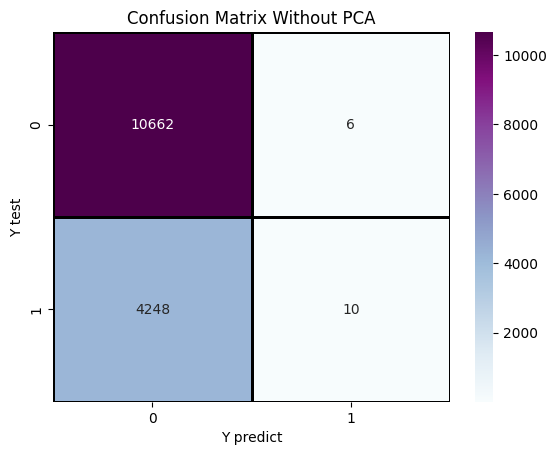

without pca AP:0.7149939702532494
              precision    recall  f1-score   support

           0       0.72      1.00      0.83     10668
           1       0.62      0.00      0.00      4258

    accuracy                           0.71     14926
   macro avg       0.67      0.50      0.42     14926
weighted avg       0.69      0.71      0.60     14926



In [81]:
# without pca
svm_cls = svm.SVC()
svm_cls.fit(X_train, y_train)
y_scores = svm_cls.predict(X_test)
naive_AP = svm_cls.score(X_test, y_test)
cm = confusion_matrix(y_test, y_scores)
f, ax = plt.subplots()
sns.heatmap(
    cm, annot=True, linewidth=0.75, linecolor="black", fmt="g", ax=ax, cmap="BuPu"
)
plt.title("Confusion Matrix Without PCA")
plt.xlabel("Y predict")
plt.ylabel("Y test")
plt.show()
print("without pca AP:{}".format(naive_AP))
report = classification_report(y_test, y_scores)
print(report)

Results show that without PCA, svm classifier has 0.4% accuracy lower than the one use PCA form

## SHAP explainability for SVM

In [83]:
import shap

shap.initjs()

# Number of samples to use for shapley values
N_samples = 10

# Random 1000 samples from the test set
X_test_sample = X_test_pca.sample(n=N_samples, random_state=42)

# Getting shapley values
explainer = shap.KernelExplainer(svm_cls_pca.predict_proba, X_test_sample)
shap_values = explainer.shap_values(X_test_sample)

X does not have valid feature names, but SVC was fitted with feature names


  0%|          | 0/10 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

#### Summary - beeswarm plot for SVM

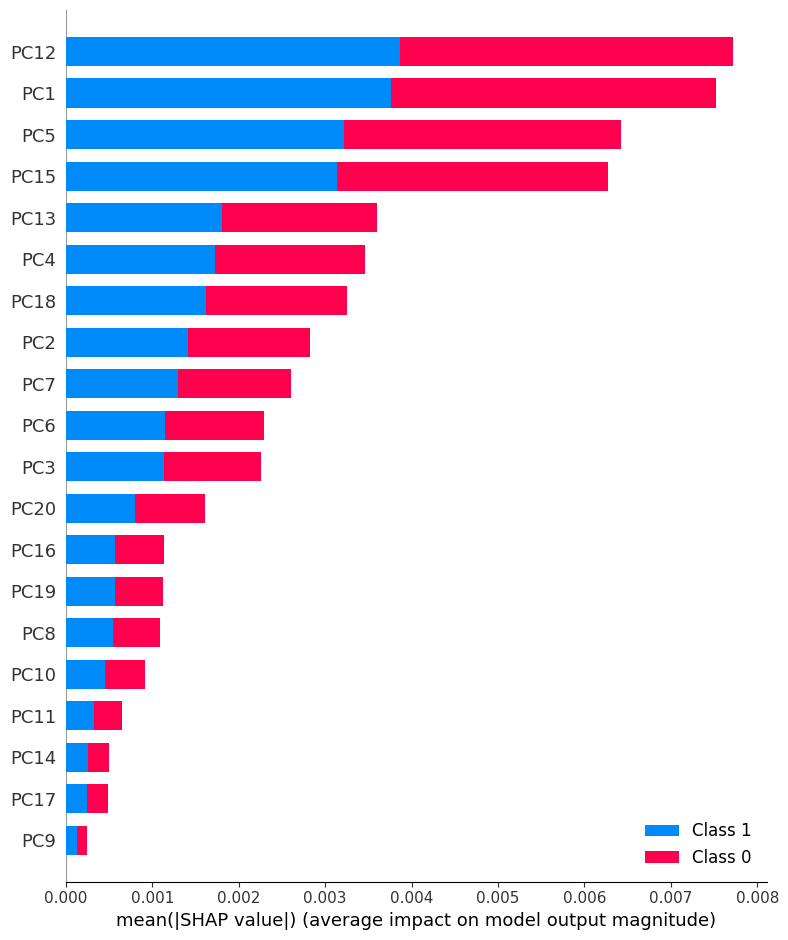

In [84]:
plt.grid(False)
shap.summary_plot(shap_values, X_test_sample)

#### Summary - bar plot for SVM

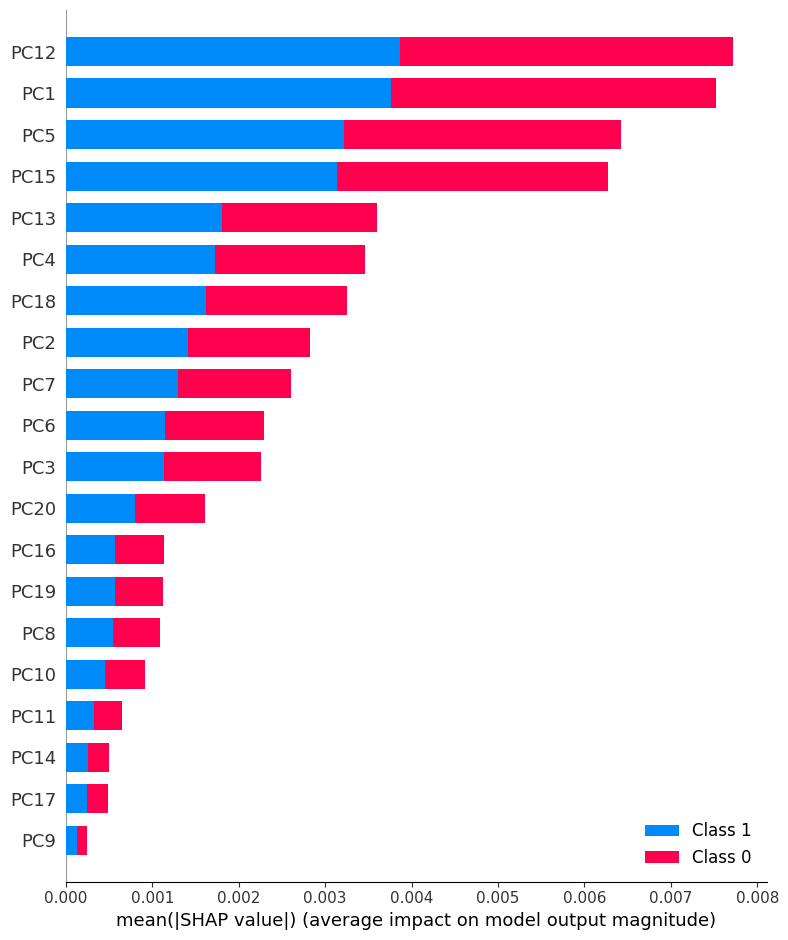

In [85]:
plt.grid(False)
shap.summary_plot(shap_values, X_test_sample, plot_type="bar")

#### Summary - force plot for SVM

In [88]:
shap.force_plot(
    explainer.expected_value[1], shap_values[1], X_test_sample, link="logit"
)

#### Waterfall plot for SVM

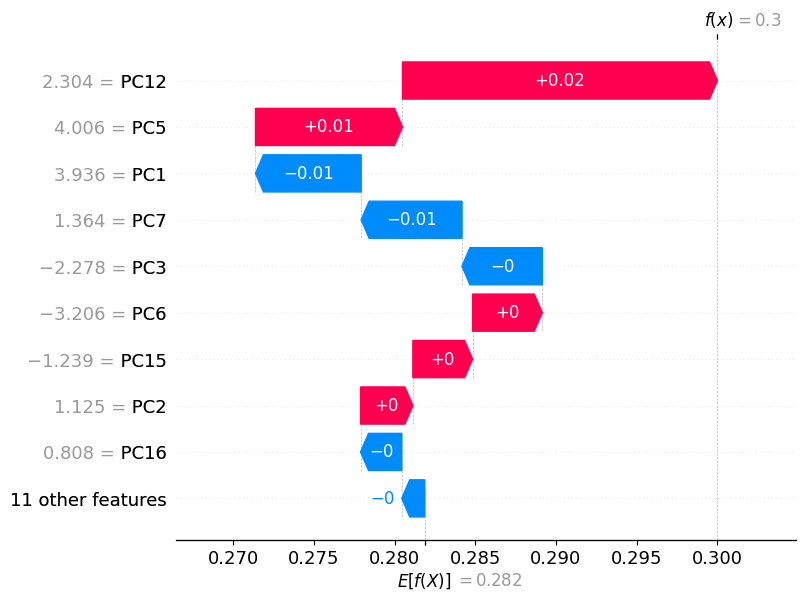

In [116]:
# Choose a patient to plot
sample_ind = 0

exp = shap.Explanation(
    shap_values[1],
    data=X_test_sample,
    base_values=explainer.expected_value[1],
    feature_names=X_test_sample.columns,
)
shap.plots.waterfall(exp[sample_ind])

#### Force plot for SVM

In [90]:
# Choose a patient to plot
sample_ind = 0

shap.force_plot(
    explainer.expected_value[1],
    shap_values[1][sample_ind, :],
    X_test_sample.iloc[sample_ind, :],
)

#### Dependence plot for SVM

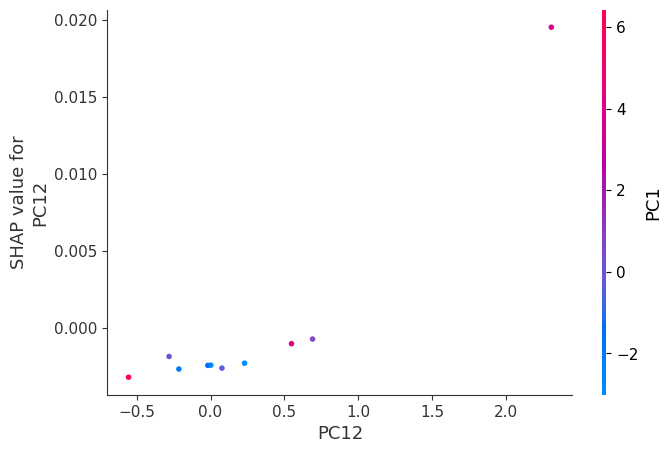

In [94]:
# Choose a feature to display
name = "PC12"

shap.dependence_plot(name, shap_values[1], X_test_sample)

#### Heatmap plot for SVM

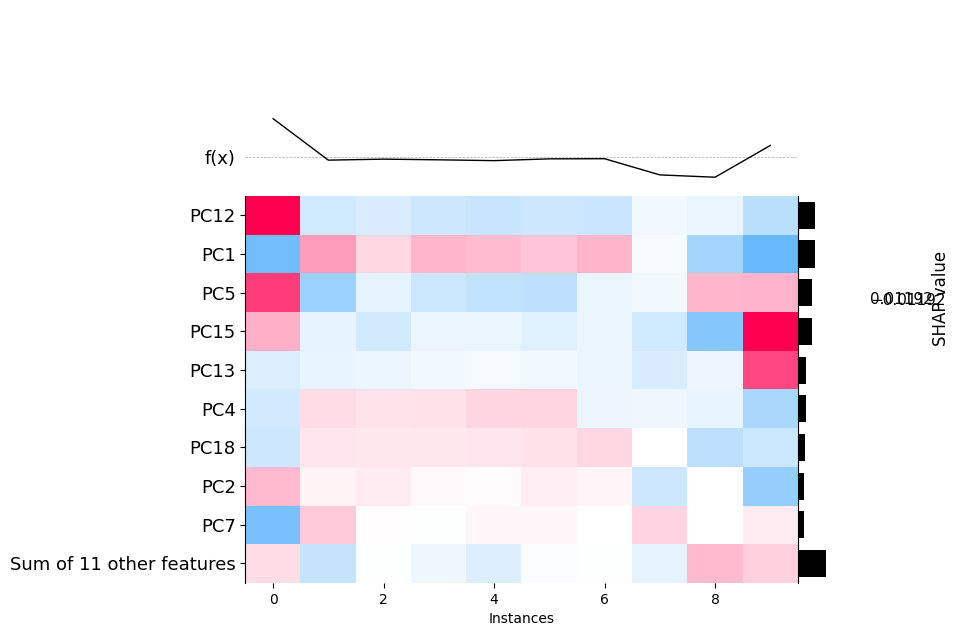

In [118]:
exp = shap.Explanation(
    shap_values[1],
    data=X_test_sample,
    base_values=explainer.expected_value[1],
    feature_names=X_test_sample.columns,
)
shap.plots.heatmap(exp)

SVMs are particularly effective in high-dimensional spaces and are well-suited for situations where the data is not linearly separable. This method is to optimize the following objective function:
$$\text{Maximize } \frac{1}{2} \|w\|^2 - C \sum_{i=1}^{N} \xi_i$$
With constraints:
$$y_i (w^T x_i + b) \geq 1 - \xi_i, \quad \text{for } i = 1, 2, \ldots, N$$
$$\xi_i \geq 0
$$
Where
$w$ are weights.
$C$ is the regularization parameter.
$\xi_i$ are slack variables.